In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded CSV file to inspect the data
file_path = r'C:\Users\Pear\Documents\Data Projects\data_files\BigmacPrice.csv'

df = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataframe
df.head()

,date,currency_code,name,local_price,dollar_ex,dollar_price
0,2000-04-01,ARS,Argentina,2.50,1,2.50
1,2000-04-01,AUD,Australia,2.59,1,2.59
2,2000-04-01,BRL,Brazil,2.95,1,2.95
3,2000-04-01,GBP,Britain,1.90,1,1.90
4,2000-04-01,CAD,Canada,2.85,1,2.85


In [304]:
# Convert 'dollar_ex' to float (if needed)
df['dollar_ex'] = df['dollar_ex'].astype(float)

# Rename columns for clarity
df.rename(columns={
    'date': 'Date',
    'currency_code': 'Currency_Code',
    'name': 'Country',
    'local_price': 'Local_Price',
    'dollar_ex': 'Dollar_Exchange_Rate',
    'dollar_price': 'Dollar_Price'
}, inplace=True)

# Check for duplicates and remove if found
df.drop_duplicates(inplace=True)

df.head()

,Date,Currency_Code,Country,Local_Price,Dollar_Exchange_Rate,Dollar_Price
0,2000-04-01,ARS,Argentina,2.50,1.0,2.50
1,2000-04-01,AUD,Australia,2.59,1.0,2.59
2,2000-04-01,BRL,Brazil,2.95,1.0,2.95
3,2000-04-01,GBP,Britain,1.90,1.0,1.90
4,2000-04-01,CAD,Canada,2.85,1.0,2.85


In [305]:
# Check to see if all EU Countries are in the dataset
# Create a list of countries to check
eu_countries = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Republic of Cyprus", "Czech Republic",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland",
    "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland",
    "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"
]

# Check which countries are in the dataset
countries_in_dataset = df["Country"].unique()
missing_countries = [country for country in eu_countries if country not in countries_in_dataset]

# Output results
missing_countries


['Bulgaria', 'Republic of Cyprus', 'Luxembourg', 'Malta']

In [306]:
# Remove missing countries and rename the list
eu_countries = [country for country in eu_countries if country not in missing_countries]

# Display the updated list
eu_countries

['Austria',
 'Belgium',
 'Croatia',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden']

In [307]:
# Filter the dataset to include only countries in the EU Countries list
df_eu = df[df["Country"].isin(eu_countries)]

# Display the filtered dataset
df_eu.head()

,Date,Currency_Code,Country,Local_Price,Dollar_Exchange_Rate,Dollar_Price
7,2000-04-01,CZK,Czech Republic,54.37,39.0,1.39
8,2000-04-01,DKK,Denmark,24.75,8.0,3.09
11,2000-04-01,HUF,Hungary,339.00,279.0,1.22
18,2000-04-01,PLN,Poland,5.50,4.0,1.38
23,2000-04-01,SEK,Sweden,24.00,8.0,3.00


In [308]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a year column
df_eu.loc[:, "Year"] = pd.to_datetime(df_eu["Date"]).dt.year

df_eu.head()

C:\Users\Pear\AppData\Local\Temp\ipykernel_32140\2477444269.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eu.loc[:, "Year"] = pd.to_datetime(df_eu["Date"]).dt.year


,Date,Currency_Code,Country,Local_Price,Dollar_Exchange_Rate,Dollar_Price,Year
7,2000-04-01,CZK,Czech Republic,54.37,39.0,1.39,2000
8,2000-04-01,DKK,Denmark,24.75,8.0,3.09,2000
11,2000-04-01,HUF,Hungary,339.00,279.0,1.22,2000
18,2000-04-01,PLN,Poland,5.50,4.0,1.38,2000
23,2000-04-01,SEK,Sweden,24.00,8.0,3.00,2000


In [309]:
# Remove the "Date" column without inplace modification to avoid warning
df_eu = df_eu.drop(columns=["Date"])

In [310]:
# Reorder columns to move "Year" to the first position
column_order = ["Year", "Currency_Code", "Country", "Local_Price", "Dollar_Exchange_Rate", "Dollar_Price"]
df_eu = df_eu[column_order]

# Display the updated dataset
df_eu.head()

,Year,Currency_Code,Country,Local_Price,Dollar_Exchange_Rate,Dollar_Price
7,2000,CZK,Czech Republic,54.37,39.0,1.39
8,2000,DKK,Denmark,24.75,8.0,3.09
11,2000,HUF,Hungary,339.00,279.0,1.22
18,2000,PLN,Poland,5.50,4.0,1.38
23,2000,SEK,Sweden,24.00,8.0,3.00


In [311]:
# Check for duplicate combinations of "Year" and "Country"
duplicate_year_country = df_eu.duplicated(subset=["Year", "Country"], keep=False)

# Display duplicate entries if any exist
df_duplicates = df_eu[duplicate_year_country]

# Show the duplicates
df_duplicates.head(6)

,Year,Currency_Code,Country,Local_Price,Dollar_Exchange_Rate,Dollar_Price
209,2006,CZK,Czech Republic,62.00,23.0,2.70
210,2006,DKK,Denmark,27.75,6.0,4.62
214,2006,HUF,Hungary,560.00,206.0,2.72
222,2006,PLN,Poland,6.50,3.0,2.17
227,2006,SEK,Sweden,33.00,7.0,4.71
243,2006,CZK,Czech Republic,59.05,22.0,2.68


In [312]:
# Aggregate duplicate year-country combinations by averaging numerical values
df_eu = df_eu.groupby(["Year", "Country", "Currency_Code"], as_index=False).agg({
    "Local_Price": "mean",
    "Dollar_Exchange_Rate": "mean",
    "Dollar_Price": "mean"
})

# Display the updated dataset
df_eu.head()

,Year,Country,Currency_Code,Local_Price,Dollar_Exchange_Rate,Dollar_Price
0,2000,Czech Republic,CZK,54.37,39.0,1.39
1,2000,Denmark,DKK,24.75,8.0,3.09
2,2000,Hungary,HUF,339.00,279.0,1.22
3,2000,Poland,PLN,5.50,4.0,1.38
4,2000,Sweden,SEK,24.00,8.0,3.00


In [313]:
# Recheck again for duplicate combinations of "Year" and "Country"
duplicate_year_country_check = df_eu.duplicated(subset=["Year", "Country"], keep=False)

# Display any remaining duplicates
df_remaining_duplicates = df_eu[duplicate_year_country_check]

# Show the result
df_remaining_duplicates.head()

,Year,Country,Currency_Code,Local_Price,Dollar_Exchange_Rate,Dollar_Price


In [314]:
# Since dollar price is equal to the euro, use that rate as a default for evalutation
# Remove "Local_Price" and "Dollar_Exchange_Rate" columns
df_eu = df_eu.drop(columns=["Local_Price", "Dollar_Exchange_Rate"])

# Display the updated dataset
df_eu.head(10)

,Year,Country,Currency_Code,Dollar_Price
0,2000,Czech Republic,CZK,1.39
1,2000,Denmark,DKK,3.09
2,2000,Hungary,HUF,1.22
3,2000,Poland,PLN,1.38
4,2000,Sweden,SEK,3.00
5,2001,Czech Republic,CZK,1.44
6,2001,Denmark,DKK,3.09
7,2001,Hungary,HUF,1.32
8,2001,Poland,PLN,1.48
9,2001,Sweden,SEK,2.40


In [315]:
# Count the number of entries for each country
country_entry_counts = df_eu["Country"].value_counts()

# Display the result
country_entry_counts

Country
Czech Republic    23
Denmark           23
Hungary           23
Poland            23
Sweden            23
Austria           12
Belgium           12
Estonia           12
Finland           12
France            12
Germany           12
Greece            12
Ireland           12
Italy             12
Netherlands       12
Portugal          12
Spain             12
Lithuania          6
Croatia            5
Latvia             5
Romania            5
Slovakia           5
Slovenia           5
Name: count, dtype: int64

In [316]:
# Remove countries without data from 2011
countries_to_remove = ["Croatia", "Latvia", "Romania", "Slovakia", "Slovenia", "Lithuania"]
df_eu = df_eu[~df_eu["Country"].isin(countries_to_remove)]

# Filter the dataset to include only years 2011 and newer
df_eu = df_eu[df_eu["Year"] >= 2011]

# Display the updated dataset
df_eu.head()


# Display the updated dataset
df_eu.head()

,Year,Country,Currency_Code,Dollar_Price
55,2011,Austria,EUR,3.09
56,2011,Belgium,EUR,3.75
57,2011,Czech Republic,CZK,4.08
58,2011,Denmark,DKK,5.70
59,2011,Estonia,EUR,2.20


In [317]:
# Check updated counts for each country
country_entry_counts_v2 = df_eu["Country"].value_counts()

# Display the result
country_entry_counts_v2

Country
Austria           12
Belgium           12
Czech Republic    12
Denmark           12
Estonia           12
Finland           12
France            12
Germany           12
Greece            12
Hungary           12
Ireland           12
Italy             12
Netherlands       12
Poland            12
Portugal          12
Spain             12
Sweden            12
Name: count, dtype: int64

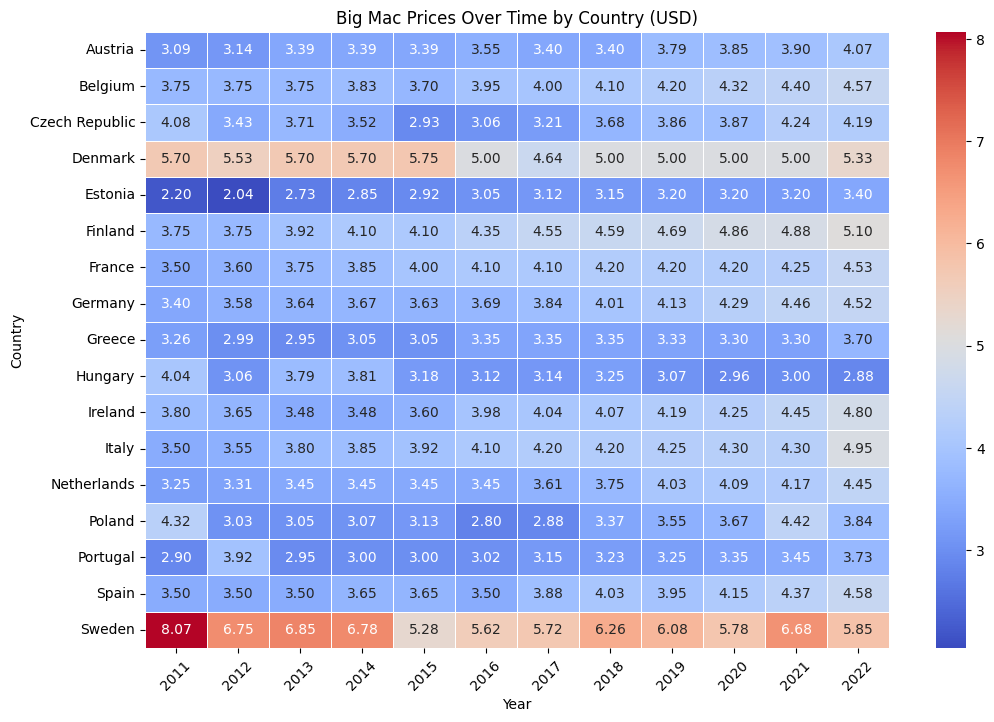

In [318]:
# Pivot the data for heatmap (Years as columns, Countries as rows, Dollar Price as values)
heatmap_data = df_eu.pivot(index="Country", columns="Year", values="Dollar_Price")

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Big Mac Prices Over Time by Country (USD)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
